<a href="https://colab.research.google.com/github/ArquimedesG/Machine_Learning_Colabs/blob/main/ML_S7_Datasets_20JL23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Converting Categorical Data to Numeric Data for Machine Learning

The datasets have both numerical and categorical features.

Categorical features refer to string data types and can be easily understood by human beings.

However, machines cannot interpret the categorical data directly.

Therefore, the categorical data must be converted into numerical data for further processing.

In [ ]:
# Import the required libraries

import numpy as np
import pandas as pd
# Methods for Data Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Library for plotting tools
import matplotlib.pyplot as plt
# Library for data preprocessin tools
from sklearn import preprocessing

In [ ]:
#   Create a dictionary with 3 keys *nombre, saldo and paises) and 8 elements for each key
datos={
    "nombre":[
        "Arquimedes", "Jose", "Armando", "Sofia",
        "Maria", "Soledad", "Snoopy", "Eduardo"
      ],
    "saldo":[
        54458, 6464, 5454, 1000,
        5454582, 64624, 54254, 12000
      ],
    "paises":[
        "Jamaica", "Alemania", "Finlandia", "Albania",
        "Jamaica", "Alemania", "Finlandia", "Albania"
      ]
}
datos

{'nombre': ['Arquimedes',
  'Jose',
  'Armando',
  'Sofia',
  'Maria',
  'Soledad',
  'Snoopy',
  'Eduardo'],
 'saldo': [54458, 6464, 5454, 1000, 5454582, 64624, 54254, 12000],
 'paises': ['Jamaica',
  'Alemania',
  'Finlandia',
  'Albania',
  'Jamaica',
  'Alemania',
  'Finlandia',
  'Albania']}

In [ ]:
# Assign the dictionary to a Dataframe from Pandas
datos=pd.DataFrame(datos)

In [ ]:
#  Print the "paises" column of the dataframe.
#  It shows the data in the columns is of type "object"
datos.paises

0      Jamaica
1     Alemania
2    Finlandia
3      Albania
4      Jamaica
5     Alemania
6    Finlandia
7      Albania
Name: paises, dtype: object

In [ ]:
#  Changing type of the elements on the column "paises" to "category"
#  Python detects four categories
datos['paises']=datos['paises'].astype("category")
print(datos['paises'])

0      Jamaica
1     Alemania
2    Finlandia
3      Albania
4      Jamaica
5     Alemania
6    Finlandia
7      Albania
Name: paises, dtype: category
Categories (4, object): ['Albania', 'Alemania', 'Finlandia', 'Jamaica']


# Improper Method to Convert Categorical Data to Numeric Data

In [ ]:
# Create a copy of the original dataframe
datos_mal=datos.copy()

In [ ]:
# Create a dictionary for the four exisitng categories and assigning a different number to each one
remplazos={
    'Jamaica':1,
    'Alemania':2,
    'Finlandia':3,
    'Albania':4
}
remplazos

{'Jamaica': 1, 'Alemania': 2, 'Finlandia': 3, 'Albania': 4}

In [ ]:
# Replacing the names on the "paises" columns by its corresponding number per the dictionary "remplazos"
datos_mal['paises'].replace(remplazos, inplace=True)
datos_mal

,nombre,saldo,paises
0,Arquimedes,54458,1
1,Jose,6464,2
2,Armando,5454,3
3,Sofia,1000,4
4,Maria,5454582,1
5,Soledad,64624,2
6,Snoopy,54254,3
7,Eduardo,12000,4


  Assigning a number to each category is not a good practice.  
  The reason is that by assigning incremental numbers, the difference between categories is not the same, meaning that contiguous categories are just one unit apart vs. other categories that are further apart from each other, which should not be the case.  
    All categories must have the same distance apart from each other

# Right Method to Convert Categorical Data to Numeric Data

In [ ]:
# Create a copy of the original dataframe
datos_bien=datos.copy()


# One-Hot Encoding
  
  One-hot encoding is the process by which categorical data are converted into numerical data for use in machine learning.
  
  Categorical features are turned into binary features that are “one-hot” encoded, meaning that if a feature is represented by that column, it receives a 1.
  
  Otherwise, it receives a 0.

  One-hot encoding can be used to transform one or more categorical features
  into numerical dummy features useful for training machine learning model.

  Because machine learning algorithms assume (and require) your data to be numeric, categorical data must be pre-processed in order for it to be accepted.

  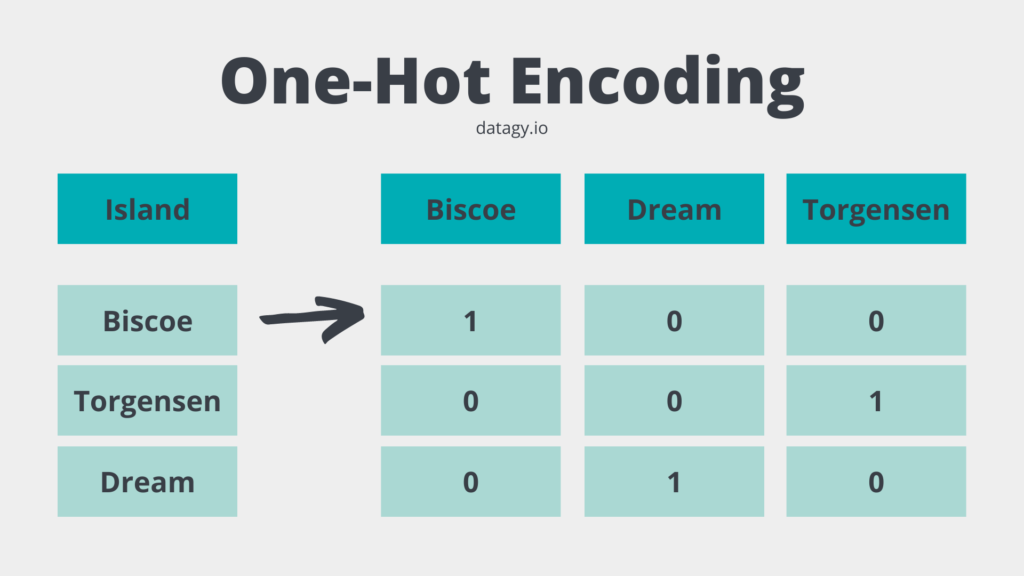

# SKLearn OneHotEncoder

Sklearn comes with a one-hot encoding tool built-in: the OneHotEncoder class.

The OneHotEncoder class takes an array of data and can be used to one-hot encode the data.

*class sklearn.preprocessing.OneHotEncoder(categories='auto', drop=None, sparse='deprecated', sparse_output=True, dtype=<class 'numpy.float64'>, handle_unknown='error', min_frequency=None, max_categories=None, feature_name_combiner='concat')*

Encode categorical features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse_output parameter)

By default, the encoder derives the categories based on the unique values in each feature. Alternatively, you can also specify the categories manually.

# fit_transform Method

The fit_transform method from the sklearn.preprocessing class is used to preprocess the data for model training.

The fit() method calculates the various required parameters, and the transform() method applies the calculated parameters to standardize the data.

In [ ]:
# Importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Creating an object based on class OneHotEncoder
codificador=OneHotEncoder()
#  Transforming the data on the column "paises" and assigning the transform to "codificacion"
codificacion=codificador.fit_transform(datos[["paises"]])

print(codificacion)

  (0, 3)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 0)	1.0
  (4, 3)	1.0
  (5, 1)	1.0
  (6, 2)	1.0
  (7, 0)	1.0


In [ ]:
#  Using the transform to create a new set of columns with the data One-Hot Encoded
nuevas_cols =pd.DataFrame(codificacion.toarray(),
                         columns=codificador.categories_)
nuevas_cols

,Albania,Alemania,Finlandia,Jamaica
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0


In [ ]:
# Concatenating the columns of the original dataframe with the new colums created "nuevas_cols"
datos_bien=pd.concat([datos, nuevas_cols], axis="columns")
datos_bien

,nombre,saldo,paises,"(Albania,)","(Alemania,)","(Finlandia,)","(Jamaica,)"
0,Arquimedes,54458,Jamaica,0.0,0.0,0.0,1.0
1,Jose,6464,Alemania,0.0,1.0,0.0,0.0
2,Armando,5454,Finlandia,0.0,0.0,1.0,0.0
3,Sofia,1000,Albania,1.0,0.0,0.0,0.0
4,Maria,5454582,Jamaica,0.0,0.0,0.0,1.0
5,Soledad,64624,Alemania,0.0,1.0,0.0,0.0
6,Snoopy,54254,Finlandia,0.0,0.0,1.0,0.0
7,Eduardo,12000,Albania,1.0,0.0,0.0,0.0


In [ ]:
# Showing the names of the columns for the new array
datos_bien.columns

Index([      'nombre',        'saldo',       'paises',   ('Albania',),
        ('Alemania',), ('Finlandia',),   ('Jamaica',)],
      dtype='object')

# Data Normalization

When you normalize data, you change the scale of the data.

Data is commonly rescaled to fall between 0 and 1, because machine learning algorithms tend to perform better, or converge faster, when the different features are on a smaller scale.

Before training machine learning models on data, it’s common practice to normalize the data first to potentially get better, faster results.

 Normalization also makes the training process less sensitive to the scale of the features, resulting in better coefficients after training.

 This process of making features more suitable for training by rescaling is called feature scaling.

 The most widely used types of normalization techniques in machine learning are:

    Min-max
    Z-score
    Log scaling

In order to implement the above techniques, the following functions are used to achieve functionality:

    The fit(data): This method helps compute the mean and std dev for a given feature, which assists in further scaling.

    The transform(data): This supports performing scaling using mean and std dev calculated using the .fit() method.

    The fit_transform(): This method performs both fit and transform.

# Dataset Normalization Example

In this example, we have a set of data that has two variables: income and number of cars.

It is noticeable those two variables have very different scales.

Number of cars will have small integer numbers with slight variations (a few units) between them.

In the other hand, income will manage very large float numbers with significant variations between them (many units).

In [ ]:
# Importing the dataset
datos= pd.read_csv("https://gist.githubusercontent.com/javierIA/f2767d680aaaee5d21f37ae623773925/raw/d6a2241f93b4aad80ba3985a835bbd30546a9dc1/raw.githubusercontent.com_CodigoMaquina_code_main_datos_datos_personas.csv")

In [ ]:
# Printing the dataset
datos

,ingreso,carros
0,22273.577534,3
1,8961.047249,1
2,7437.977263,2
3,12064.915290,2
4,9296.396167,1
...,...,...
995,9998.522402,0
996,6867.097603,2
997,9757.539280,1
998,11044.031510,1


In [ ]:
# Summary of the dataset
datos.describe()

,ingreso,carros
count,1000.000000,1000.000000
mean,10078.606402,1.239000
std,2533.681258,1.030991
min,1222.253800,0.000000
25%,8397.061976,0.000000
50%,10072.833245,1.000000
75%,11689.680823,2.000000
max,22273.577534,3.000000



 It can be observed that the column "ingreso" has a significant difference (over 20k) between its lowest value (1,222.25) and its highest value (22,273.57)

 However, the column "carros" can only take four different values from 0 to 3

 It is important to normalize this data to help a model to be trained properly without having to manage significant magnitude differences between those parameters.

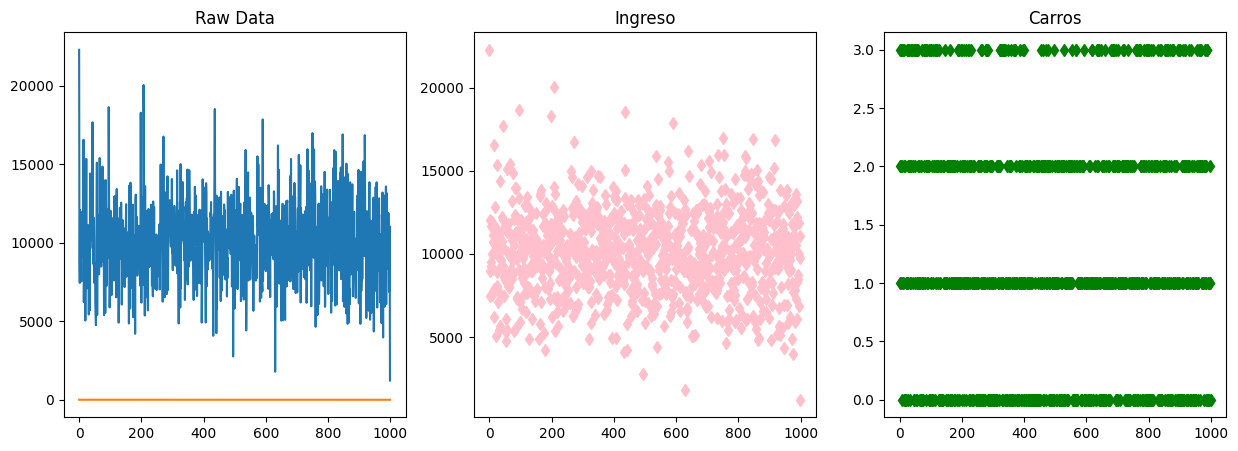

In [ ]:
#  Plotting data to show the difference on its mean value and spread for each column

# Defining a plotting area
fig=plt.figure(figsize=(15,5))
# Defining 3 plotting areas
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
# Defining the Title for each plotting area
ax1.set_title("Raw Data")
ax2.set_title("Ingreso")
ax3.set_title("Carros")
# Defining the data to show on each plotting area
ax1.plot(datos)
ax2.plot(datos['ingreso'], linewidth=0, marker="d", color="pink")
ax3.plot(datos['carros'], linewidth=0, marker="d", color="green")

# MinMaxScaler() Fuction

You can use the scikit-learn preprocessing.MinMaxScaler() function to normalize each feature by scaling the data to a range.

The MinMaxScaler() function scales each feature individually so that the values have a given minimum and maximum value, with a default of 0 and 1.

The formula to scale feature values to between 0 and 1 is:

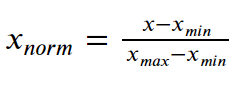

Subtract the minimum value from each entry and then divide the result by the range, where range is the difference between the maximum value and the minimum value.


In [ ]:
# Using the MinMaxScaler function to normalize the data and assigning it to "datos_min_max_scal"
datos_min_max_scal= preprocessing.MinMaxScaler().fit_transform(datos)
# Printing the new set of data
datos_min_max_scal


NameError: ignored

The output shows that the values are scaled to have the default minimum value of 0 and maximum value of 1.

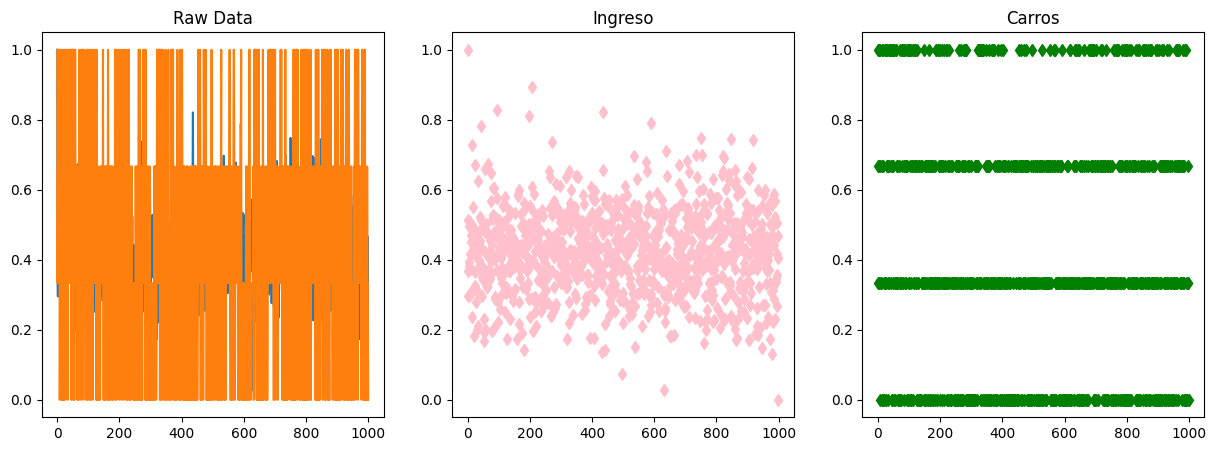

In [ ]:
# Defining a plotting area
fig=plt.figure(figsize=(15,5))
# Defining 3 plotting areas
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
# Defining the Title for each plotting area
ax1.set_title("Raw Data")
ax2.set_title("Ingreso")
ax3.set_title("Carros")
# Defining the data to show on each plotting area
ax1.plot(datos_min_max_scal)
ax2.plot(datos_min_max_scal[:,0], linewidth=0, marker="d", color="pink")
ax3.plot(datos_min_max_scal[:,1], linewidth=0, marker="d", color="green")

  All data is now within 0-1.  

  It can be observed that the smallest number on each group got a new value assigned of zero and the highest number got a new value assigned of one.  
  
  All the other data points are scales within that range.

# Least Squares Error: Normalize() Function

The normalize() function scales vectors individually to a unit norm so that the vector has a length of one.

The default norm for normalize() is L2, also known as the Euclidean norm or least squares error (LSE).

The L2 norm formula is the square root of the sum of the squares of each value.

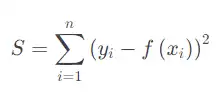

Although using the normalize() function results in values between 0 and 1, it’s not the same as simply scaling the values to fall between 0 and 1.

When you normalize a dataset without converting features, or columns, into arrays for processing, the data is normalized by row.

The default axis for the normalize() function is 1, which means that each sample, or row, is normalized.

# .T Attribute
The .T attribute returns the transpose of a NumPy array as a new NumPy array without modifying the original array.

In [ ]:
# Using the Normalizer function to normalize the data and assigning it to "datos_normalizer"
datos_normalizer=preprocessing.Normalizer().transform(datos.T)
datos_normalizer=datos_normalizer.T
# Printing the new set of data
datos_normalizer

array([[0.06777903, 0.05886881],
       [0.02726868, 0.01962294],
       [0.02263394, 0.03924588],
       ...,
       [0.02969242, 0.01962294],
       [0.03360725, 0.01962294],
       [0.00371935, 0.        ]])

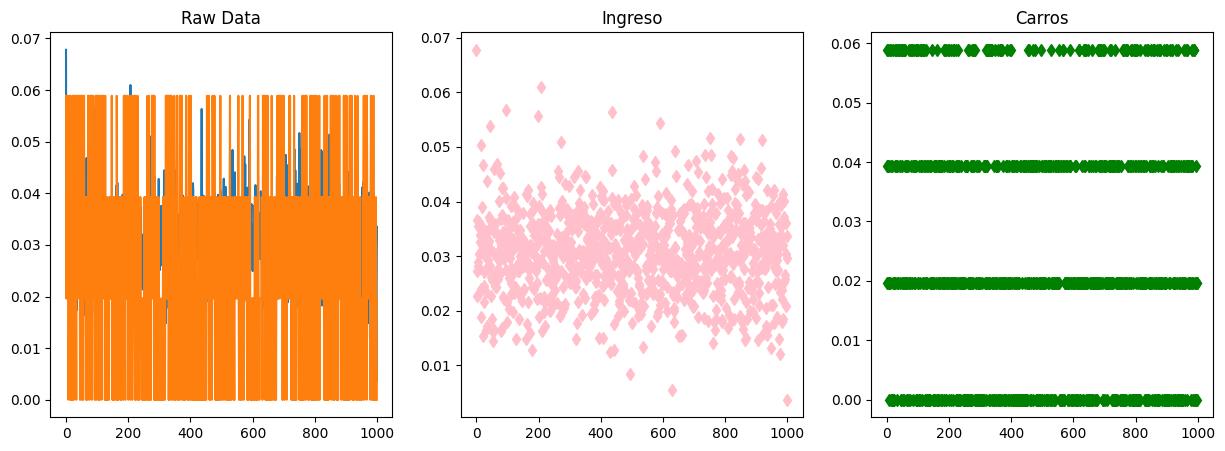

In [ ]:
# Defining a plotting area
fig=plt.figure(figsize=(15,5))
# Defining 3 plotting areas
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
# Defining the Title for each plotting area
ax1.set_title("Raw Data")
ax2.set_title("Ingreso")
ax3.set_title("Carros")
# Defining the data to show on each plotting area
ax1.plot(datos_normalizer)
ax2.plot(datos_normalizer[:,0], linewidth=0, marker="d", color="pink")
ax3.plot(datos_normalizer[:,1], linewidth=0, marker="d", color="green")

   In this case for the first column "ingreso", none of the values is assigned the value 0 or 1.
   For the column "carros", zero is assigned to the lowest value but 0.06 rather than 1 is assigned to the highest value.

# Z-score Normalization: Standard Scaler() Function

Also called standardization, z-score normalization sees features rescaled in a way that follows standard normal distribution property with μ=0 and σ=1, where μ is the mean (average) and σ is the standard deviation from the mean.

The standard score or z-score of the samples are calculated using the following formula.

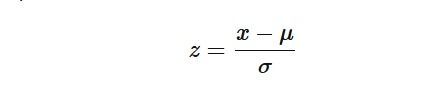

where x is a raw value, z is the normalized value, u is the mean of the values, and sd is the standard deviation of the values.

In [ ]:
# Using the StandardScaler function to normalize the data and assigning it to "datos_std"
datos_std=preprocessing.StandardScaler().fit_transform(datos)
# Printing the new data set
datos_std

array([[ 4.81555174,  1.70892042],
       [-0.4413019 , -0.23193185],
       [-1.04273197,  0.73849429],
       ...,
       [-0.12678303, -0.23193185],
       [ 0.38122719, -0.23193185],
       [-3.49719763, -1.20235798]])

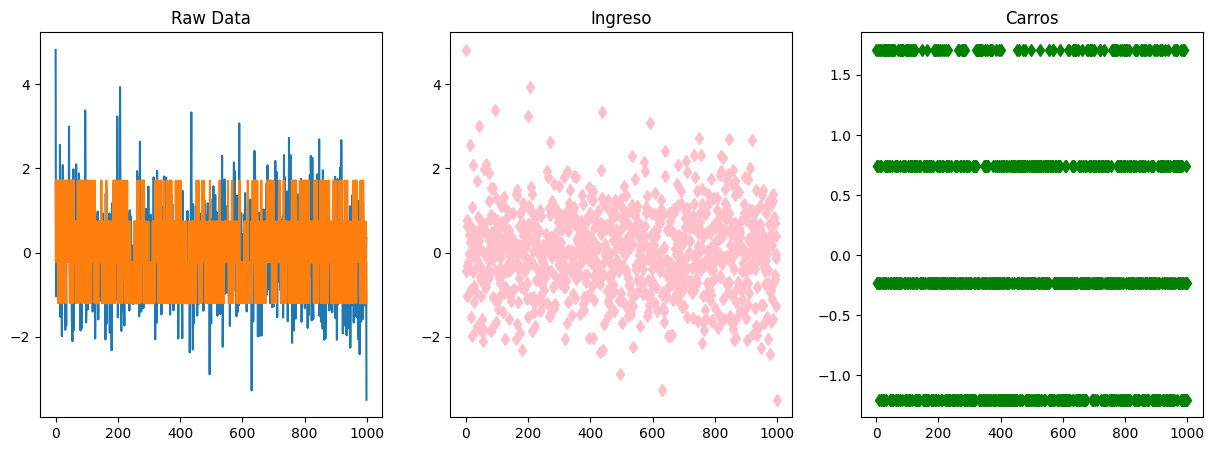

In [ ]:
# Defining a plotting area
fig=plt.figure(figsize=(15,5))
# Defining 3 plotting areas
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
# Defining the Title for each plotting area
ax1.set_title("Raw Data")
ax2.set_title("Ingreso")
ax3.set_title("Carros")
# Defining the data to show on each plotting area
ax1.plot(datos_std)
ax2.plot(datos_std[:,0], linewidth=0, marker="d", color="pink")
ax3.plot(datos_std[:,1], linewidth=0, marker="d", color="green")

In this case, the data in the column "Ingreso" is scaled within a range of 4.8 to -3.49.

The data for the column "Carros" is scaled now within a range from -1.2 to 1.7

The values that get a zero assigned in the normalization are right at the mean value of the data set and the new values of the others show how many standard deviations they are away from the mean value.

# Normalization Techniques Comparison

In [ ]:
# Converting each of the normalized datasets to a dataframe with the coresponding column titles
# Data normalized using Min_Max_Scaler()
datos_min_max_scal=pd.DataFrame(datos_min_max_scal,columns=["ingreso","carros"])
# Data normalized using Normalize()
datos_normalizer=pd.DataFrame(datos_normalizer,columns=["ingreso","carros"])
# Datos normalized using Standard_Scaler()
datos_std=pd.DataFrame(datos_std,columns=["ingreso","carros"])

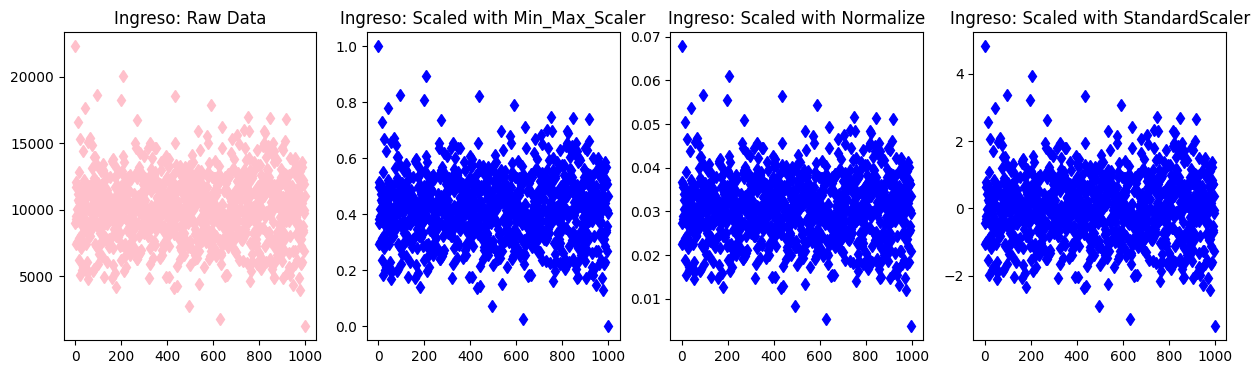

In [ ]:
# Defining a plotting area
fig=plt.figure(figsize=(15,4))
# Defining 3 plotting areas
ax1=fig.add_subplot(1,4,1)
ax2=fig.add_subplot(1,4,2)
ax3=fig.add_subplot(1,4,3)
ax4=fig.add_subplot(1,4,4)
# Defining the Title for each plotting area
ax1.set_title("Ingreso: Raw Data")
ax2.set_title("Ingreso: Scaled with Min_Max_Scaler")
ax3.set_title("Ingreso: Scaled with Normalize")
ax4.set_title("Ingreso: Scaled with StandardScaler")
# Defining the data to show on each plotting area
ax1.plot(datos['ingreso'],linewidth=0,marker="d",color="pink")
ax2.plot(datos_min_max_scal['ingreso'],linewidth=0,marker="d",color="blue")
ax3.plot(datos_normalizer['ingreso'],linewidth=0,marker="d",color="blue")
ax4.plot(datos_std['ingreso'],linewidth=0,marker="d",color="blue")


It can be observed that the normalization of the data defines different ranges for the new data depending on the normalization technique selected.